In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Drop all continuous features
cont_feat = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

,Survived,Name,Sex,Age,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,C123,S
4,0,"Allen, Mr. William Henry",male,35.0,373450,NaN,S


In [4]:
# Dropping Name and Age, these are identifiers
titanic.drop(['Name', 'Age'], axis=1, inplace=True)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


## Explore categorical features
#### Explore Sex, Cabin and Embarked

In [6]:
# To know info about non null features and their count
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [7]:
titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [8]:
# From above output it says that, 66% of people whose having cabin or survived. Add a new feature with boolen value whether cabin is null or not
# np.where() is conditional method like if. This adds a new column with 0 or 1 based on cabin is there or not
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [10]:
titanic.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


## Plot categorical features

<Figure size 432x288 with 0 Axes>

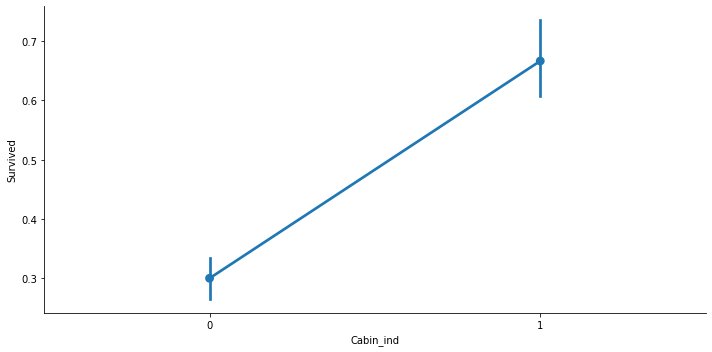

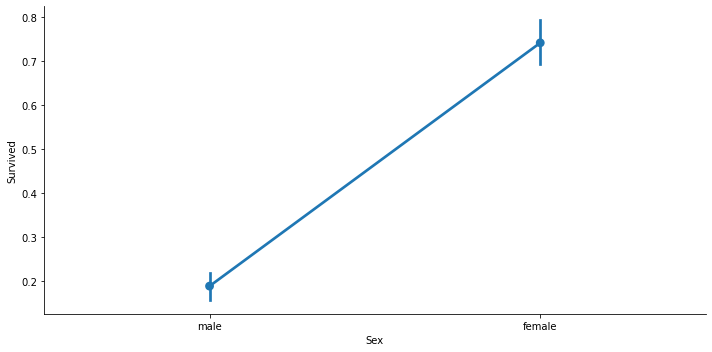

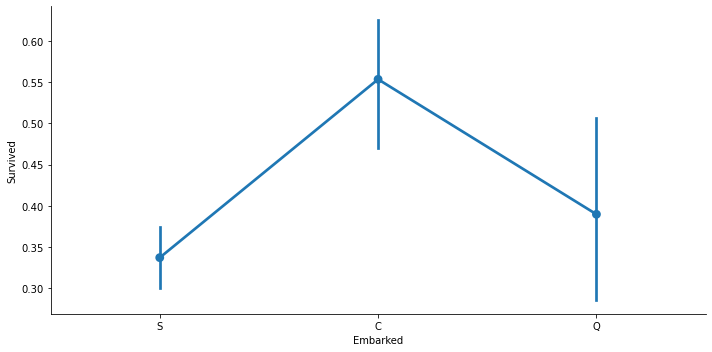

In [11]:
for i, col in enumerate(['Cabin_ind', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,)

In [13]:
# Exploring the relationship between multiple variables using Pivot tables. Python has nice module pivot_table from pandas package.
# By default pivot_table does 'mean'. But to find the distribution we see count aggrigate function.
titanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [14]:
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129
